# Multi - Armed Bandit





## 1. Import Modules

In [14]:
import numpy as np
from matplotlib import pyplot as plt
import random
import math

## 2. Define Classes





Bandit class defines a single bandit object whose reward has a normal distribution with mean value as input parameter and a standard deviation of 1. 

gen_reward(): generates a random reward on pulling the bandit arm. 
gen_reward_sample(): generates a sample of random rewards of size 'number'.

In [15]:
class Bandit:
    
    reward_std=1 #standard deviation of reward
    
    def __init__(self,mean):
        self.reward_mean=mean
        
    def gen_reward(self):
        return np.random.normal(self.reward_mean,self.reward_std)
    
    def gen_reward_sample(self,number):
        return np.random.normal(self.reward_mean,self.reward_std,number)

MultiArmedBandit class initializes a multiarmed bandit object with 'k' arms each with a mean reward which is distributed normally with mean 0 and standard deviation 1. 

pull_lever(a): pulls the a'th arm of the bandit and generates a random reward.

In [16]:
class MultiArmedBandit:
    bandits=[]
    def __init__(self,k):
        self.arms=k
        for ind,mean in zip(range(k),np.random.normal(0,1,k)): #mean of bandit reward is Normally distributed N(0,1)
            self.bandits.append(Bandit(mean))
        
    def display_rewards(self, scatter_points=100):
        fig=plt.figure()
        ax=fig.gca()
        for j in range(self.arms):
            ax.scatter([j]*scatter_points,self.bandits[j].gen_reward_sample(scatter_points))
        ax.set_xticks(list(range(self.arms)))
        ax.set_ylabel('Reward Distribution')
        
    def pull_lever(self,a):
        return self.bandits[a].gen_reward()

The agent is defined by a Robot class which has an initial guess of each of the bandit's value given by the list Q. It maintains a count on the number of times it has pulled each bandit through the list n. 

The exploration v exploitation strategy is determined by the parameters epsilon, alpha.

Method explore makes the robot pull a random bandit arm.
Method exploit makes the robot pull the bandit arm with the maximum Q value.


In [ ]:
class Robot():
    Q=[]
    N=[]
    t=1
    
    def __init__(self,arms,Q_initial,epsilon):
        self.arms=arms
        self.Q=[Q_initial]*arms
        self.N=[1]*arms
        self.epsilon=epsilon
    
    def explore(self):
        return random.choice(range(self.arms))
    
    def exploit(self):
        return np.argmax(self.Q)
    
    def update_q_avg(self,a,R):
        self.N[a]+=1
        self.t+=1
        self.Q[a]=self.Q[a]+1/self.N[a]*(R-self.Q[a])

    def choose_action(self):
        if np.random.uniform()<self.epsilon:
            return self.explore()
        else:
            return self.exploit()
    
    def choose_action_ucb(self,c):
        N_sqrt=np.asarray([math.sqrt(x) for x in self.N])
        
        return np.argmax(np.asarray(self.Q)+c*math.sqrt(math.log(self.t))/N_sqrt)

Simulation class runs the simulation where it uses the robot object and can use several exploration-exploitation strategies to maximize the expected reward. 

The class is initialized with the parameters:

1.   k: number of bandit arms
2.   epsilon: parameter for epsilon greedy strategy
3.   experiments: number of replications of the experiment.
4.   Q_0: initial guess of the value function for each bandit. 



In [ ]:
class Simulation():
    
    reward_table=np.array([])
    
    def __init__(self,k,epsilon,experiments,Q_0):
        self.k=k
        self.epsilon=epsilon
        self.experiments=experiments
        self.Q_0=Q_0
    
    def run_Simulation_epsGreedy(self):
        for j in range(self.experiments):      
            mab1= MultiArmedBandit(self.k)
            robot1=Robot(self.k,self.Q_0,self.epsilon)
            reward_list=np.array([])
            
            for i in range(1001):
                action=robot1.choose_action()
                reward=mab1.pull_lever(action)
                robot1.update_q_avg(action,reward)
                reward_list=np.append(reward_list,reward)
            if j==0:
                reward_table=reward_list
            else:
                reward_table=np.vstack([reward_table,reward_list])   
        return np.mean(reward_table,axis=0)  
    
    def run_Simulation_ucb(self):
        for j in range(self.experiments):      
            mab1= MultiArmedBandit(self.k)
            robot1=Robot(self.k,self.Q_0,self.epsilon)
            reward_list=np.array([])
            
            for i in range(1001):
                action=robot1.choose_action_ucb(2)
                reward=mab1.pull_lever(action)
                robot1.update_q_avg(action,reward)
                reward_list=np.append(reward_list,reward)
            if j==0:
                reward_table=reward_list
            else:
                reward_table=np.vstack([reward_table,reward_list])   
        return np.mean(reward_table,axis=0)  


## 3. Demonstration

Initialize a multi-armed bandit object with 5 arms and display the distribution of reward in each arm.

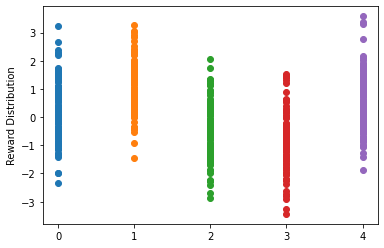

In [13]:
mab1=MultiArmedBandit(5)
mab1.display_rewards(100)

Now we will conduct a simulation experiment where a robot 
(or agent) which will pull at one of the arms of the bandit for 1000 trials. It has to maximize the rewards. 

The robot will follow one of the four strategies:


1.   Epsilon greedy strategy with $\epsilon=0.1$ with an initial guess of the value of reward from each arm to be 0. ($Q_0=0$)
2.   Epsilon greedy strategy with $\epsilon=0.1$ with an initial guess of the value of reward from each arm to be 0. ($Q_0=5$)
3. UCB strategy with $\epsilon=0.1$ with an initial guess of the value of reward from each arm to be 0. ($Q_0=0$)
4. Epsilon greedy strategy with $\epsilon=0.9$ with an initial guess of the value of reward from each arm to be 0. ($Q_0=0$): Here the robot is very greedy

The simulation is repeated for 2000 times and the average reward gained by the robot after each trial is plotted.



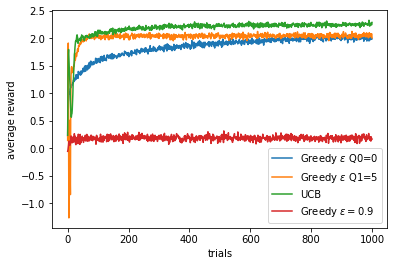

In [17]:

sim1=Simulation(k=10,epsilon=0.1,experiments=2000,Q_0=0)
sim2=Simulation(k=10,epsilon=0.1,experiments=2000,Q_0=5)
sim3=Simulation(k=10,epsilon=0.1,experiments=2000,Q_0=0)
sim4=Simulation(k=10,epsilon=0.9,experiments=2000,Q_0=0)

plt.plot(sim1.run_Simulation_epsGreedy(),label=r'Greedy $\epsilon$ Q0=0')
plt.plot(sim2.run_Simulation_epsGreedy(),label=r'Greedy $\epsilon$ Q1=5')
plt.plot(sim3.run_Simulation_ucb(),label='UCB')
plt.plot(sim4.run_Simulation_epsGreedy(),label=r'Greedy $\epsilon=0.9$')
plt.xlabel('trials')
plt.ylabel('average reward')
plt.legend(loc='lower right')

We can see that with more trials, the expected rewards increase for the first three simulations. This means that the robot has learned the reward maximizing arms. The robot explores strategies in the beginning and slowly starts exploiting on its learned knowledge.


With $\epsilon=0.9$, the agent is too greedy and the expected reward is almost constant.